### Importing Required Libraries

In this step, we import all the necessary libraries for data preprocessing, feature extraction, model training, evaluation, and visualization:

- **pandas**: For data manipulation and analysis.  
- **re**: For regular expression operations in text cleaning.  
- **nltk**: For natural language processing tasks such as stopword removal and stemming/lemmatization.  
- **scikit-learn**:  
  - `train_test_split` for splitting the dataset into training and testing sets.  
  - `TfidfVectorizer` for transforming text data into numerical features.  
  - `LogisticRegression` and `SVC` for model training.  
  - `accuracy_score` and `f1_score` for model evaluation.  
- **wordcloud**: For generating word cloud visualizations from text data.  
- **matplotlib**: For creating plots and visualizations.  
- **joblib**: For saving and loading trained machine learning models.  


In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import wordnet
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import joblib
import nltk

### Downloading NLTK Resources

Before performing text preprocessing, we need to ensure that the required **NLTK datasets** are available locally:

- **stopwords**: A collection of commonly used words (like *the, is, in*) that are usually removed during text cleaning.  
- **wordnet**: A lexical database for the Eng


In [2]:
# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
# Mount Google Drive to access your dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load the datasets from your Google Drive path
folder_path = '/content/drive/MyDrive/Colab Notebooks/task2/'
fake_df = pd.read_csv(folder_path + 'Fake.csv')
true_df = pd.read_csv(folder_path + 'True.csv')

### Dataset Labeling and Preprocessing

1. **Label Assignment**  
   - A new column `label` is added to each DataFrame.  
     - `0` represents *fake news*.  
     - `1` represents *real news*.  

2. **Dataset Combination and Shuffling**  
   - The two datasets are merged into a single DataFrame `news_df`.  
   - The rows are shuffled to remove any ordering bias and the index is reset.  

3. **Text Preprocessing**  
   A custom function `preprocess_text()` is defined to clean and normalize the text data:  
   - Converts all text to lowercase.  
   - Removes non-alphabetic characters using regular expressions.  
   - Tokenizes text into words.  
   - Removes common English stopwords.  
   - Applies lemmatization with **WordNet** to reduce words to their base form.  
   - Joins the cleaned tokens back into a single string.  

4. **Application of Preprocessing**  
   - The `text` column in `news_df` is transformed using the preprocessing function.  


In [6]:
# Add a 'label' column to each DataFrame
fake_df['label'] = 0  # 0 for fake news
true_df['label'] = 1  # 1 for real news

# Combine the datasets
news_df = pd.concat([fake_df, true_df], ignore_index=True)

# Shuffle the combined DataFrame
news_df = news_df.sample(frac=1).reset_index(drop=True)

# Preprocessing function
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = wordnet.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the 'text' column
news_df['text'] = news_df['text'].apply(preprocess_text)

### Train-Test Split and Feature Extraction

1. **Data Splitting**  
   - The dataset is divided into **training (80%)** and **testing (20%)** subsets using `train_test_split`.  
   - `X` contains the preprocessed news text.  
   - `y` contains the corresponding labels (`0` = fake, `1` = real).  
   - A fixed `random_state=42` ensures reproducibility.  

2. **TF-IDF Vectorization**  
   - A `TfidfVectorizer` is created with a maximum of 5000 features.  
   - **TF-IDF (Term Frequency–Inverse Document Frequency)** converts text into numerical features, giving higher weight to important terms while reducing the influence of common words.  

3. **Feature Transformation**  
   - The vectorizer is **fit** on the training data and transforms it into numerical vectors (`X_train_vec`).  
   - The testing data is transformed separately (`X_test_vec`) using the same fitted vectorizer, ensuring consistency.  


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(news_df['text'], news_df['label'], test_size=0.2, random_state=42)

# Create a TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vec = vectorizer.transform(X_test)

### Logistic Regression Model Training and Evaluation

1. **Model Initialization**  
   - A `LogisticRegression` classifier is created with `max_iter=1000` to allow sufficient iterations for convergence.  

2. **Model Training**  
   - The classifier is trained (`fit`) on the TF-IDF vectorized training data (`X_train_vec`) and labels (`y_train`).  

3. **Prediction**  
   - The trained model generates predictions (`y_pred`) on the test data (`X_test_vec`).  

4. **Evaluation Metrics**  
   - **Accuracy**: Measures the proportion of correct predictions over all samples.  
   - **F1-score**: Harmonic mean of precision and recall, useful when the dataset may be imbalanced.  
   - Both metrics are printed to provide a performance overview of the classifier.  


In [8]:
# Initialize and train a Logistic Regression classifier
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_vec, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.9892
F1-score: 0.9887


### Visualization and Model Saving

1. **Word Cloud Generation**  
   - The dataset is split by label:  
     - **Fake news (label = 0)** is concatenated into one large string (`fake_text`).  
     - **Real news (label = 1)** is concatenated into another string (`true_text`).  
   - Two word clouds are generated to visualize the most common words:  
     - Fake news word cloud.  
     - Real news word cloud.  
   - Each word cloud is displayed using `matplotlib` with appropriate titles.  

2. **Model and Vectorizer Saving**  
   - File paths are defined to save the trained **Logistic Regression model** and **TF-IDF vectorizer**.  
   - Both objects are saved using `joblib.dump()` so they can be reloaded later without retraining.  
   - Confirmation messages are printed showing where the files were stored.  


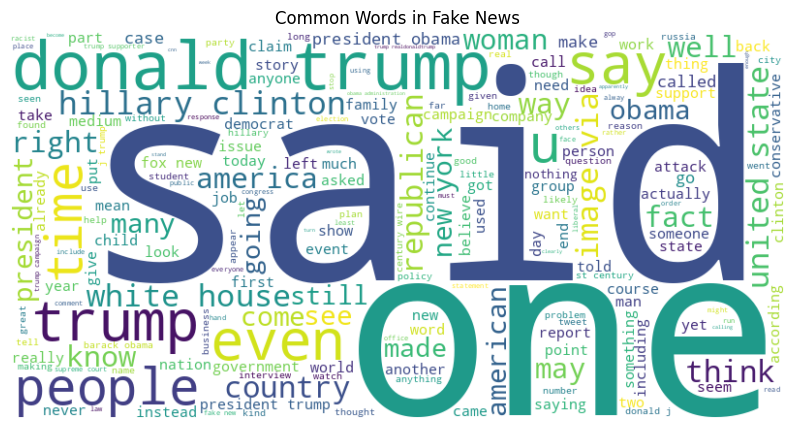

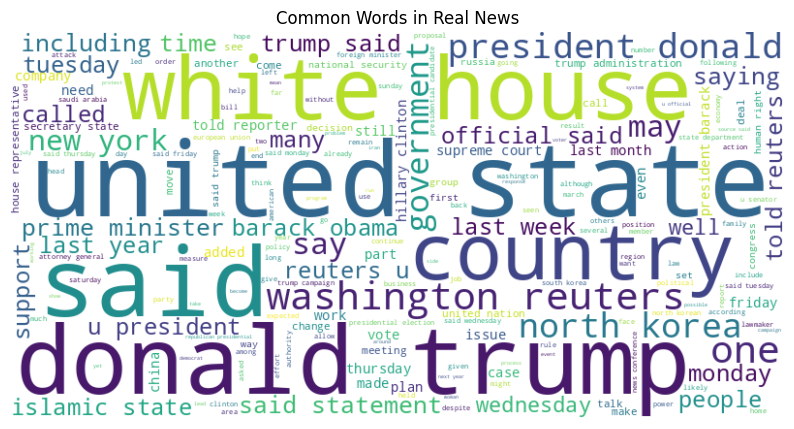

Model saved as '/content/drive/MyDrive/Colab Notebooks/task2/logistic_regression_model.joblib'
Vectorizer saved as '/content/drive/MyDrive/Colab Notebooks/task2/tfidf_vectorizer.joblib'


In [10]:
# Separate text based on label
fake_text = " ".join(text for text in news_df[news_df['label'] == 0].text)
true_text = " ".join(text for text in news_df[news_df['label'] == 1].text)

# Create and display Word Cloud for Fake News
plt.figure(figsize=(10, 8))
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Common Words in Fake News')
plt.axis('off')
plt.show()

# Create and display Word Cloud for Real News
plt.figure(figsize=(10, 8))
true_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(true_text)
plt.imshow(true_wordcloud, interpolation='bilinear')
plt.title('Common Words in Real News')
plt.axis('off')
plt.show()

# Define file paths to save the model and vectorizer
model_filename = folder_path + 'logistic_regression_model.joblib'
vectorizer_filename = folder_path + 'tfidf_vectorizer.joblib'

# Save the trained model and vectorizer
joblib.dump(log_reg_model, model_filename)
joblib.dump(vectorizer, vectorizer_filename)

print(f"Model saved as '{model_filename}'")
print(f"Vectorizer saved as '{vectorizer_filename}'")